### Training with HR Scans

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

train_ds = keras.utils.image_dataset_from_directory(
    directory=r'D:\Gaussian_blur_bicubic_interpolation\Classification\HR\train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    color_mode="rgb",
    seed=123,
    image_size=(240, 240))

test_ds = keras.utils.image_dataset_from_directory(
    directory=r'D:\Gaussian_blur_bicubic_interpolation\Classification\HR\test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    color_mode="rgb",
    seed=123,
    image_size=(240, 240))

Found 1512 files belonging to 2 classes.
Found 190 files belonging to 2 classes.


In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,  restore_best_weights=True)

history = resnet_model.fit(train_ds, epochs=40, callbacks=[callback], validation_data = test_ds)

Epoch 1/40
48/48 [==============================] - 116s 2s/step - loss: 0.5957 - accuracy: 0.7123 - val_loss: 0.6215 - val_accuracy: 0.6632
Epoch 2/40
48/48 [==============================] - 117s 2s/step - loss: 0.5397 - accuracy: 0.7328 - val_loss: 0.5264 - val_accuracy: 0.7421
Epoch 3/40
48/48 [==============================] - 118s 2s/step - loss: 0.5342 - accuracy: 0.7302 - val_loss: 0.4982 - val_accuracy: 0.7105
Epoch 4/40
48/48 [==============================] - 116s 2s/step - loss: 0.5247 - accuracy: 0.7500 - val_loss: 0.7934 - val_accuracy: 0.5632
Epoch 5/40
48/48 [==============================] - 115s 2s/step - loss: 0.4865 - accuracy: 0.7493 - val_loss: 0.5239 - val_accuracy: 0.7158
Epoch 6/40
48/48 [==============================] - 117s 2s/step - loss: 0.4819 - accuracy: 0.7586 - val_loss: 0.7126 - val_accuracy: 0.7368
Epoch 7/40
48/48 [==============================] - 116s 2s/step - loss: 0.4720 - accuracy: 0.7698 - val_loss: 0.4990 - val_accuracy: 0.7105
Epoch 8/40
48

In [10]:
y_pred = []
y_true = []

for img, labels in test_ds:
    group_labels = resnet_model.predict(img)
    for label in group_labels.tolist():
        y_pred.append(np.round(label[0]))
    labels = labels.numpy()
    for label in labels.tolist():
        y_true.append(label[0])

1/1 [==============================] - 3s 3s/step


In [11]:
y_pred

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [12]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.747368
Precision: 0.545455
Recall: 0.240000
F1 score: 0.333333


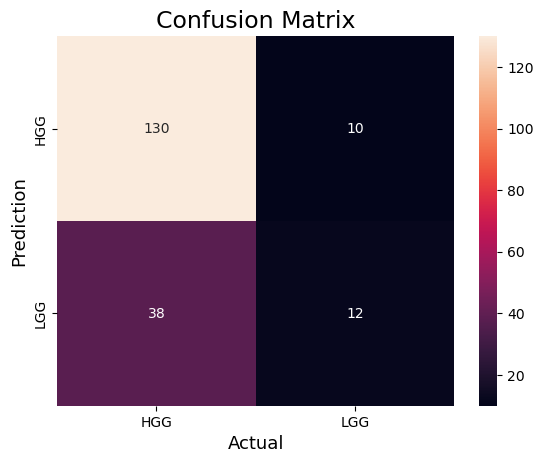

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


#Calculating the confusion matrix.
matrix = confusion_matrix(y_true,y_pred)
 
#Computing the confusion matrix.
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['HGG', 'LGG'],
            yticklabels=['HGG','LGG'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('HR_plot.png')
plt.show()

### Training with SR Scans

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

train_ds = keras.utils.image_dataset_from_directory(
    directory=r'D:\Gaussian_blur_bicubic_interpolation\Classification\SR\train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    color_mode="rgb",
    seed=123,
    image_size=(240, 240))


test_ds = keras.utils.image_dataset_from_directory(
    directory=r'D:\Gaussian_blur_bicubic_interpolation\Classification\SR\test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    color_mode="rgb",
    seed=123,
    image_size=(240, 240))

Found 1512 files belonging to 2 classes.
Found 190 files belonging to 2 classes.


In [17]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(240,240,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,  restore_best_weights=True)

history = resnet_model.fit(train_ds, epochs=40, callbacks=[callback], validation_data = test_ds)

Epoch 1/40
48/48 [==============================] - 130s 3s/step - loss: 0.5873 - accuracy: 0.7156 - val_loss: 0.6669 - val_accuracy: 0.5789
Epoch 2/40
48/48 [==============================] - 118s 2s/step - loss: 0.5556 - accuracy: 0.7255 - val_loss: 0.5684 - val_accuracy: 0.7368
Epoch 3/40
48/48 [==============================] - 124s 3s/step - loss: 0.5544 - accuracy: 0.7229 - val_loss: 0.5372 - val_accuracy: 0.7316
Epoch 4/40
48/48 [==============================] - 130s 3s/step - loss: 0.5419 - accuracy: 0.7216 - val_loss: 0.8843 - val_accuracy: 0.4105
Epoch 5/40
48/48 [==============================] - 126s 3s/step - loss: 0.5281 - accuracy: 0.7341 - val_loss: 0.6015 - val_accuracy: 0.6474
Epoch 6/40
48/48 [==============================] - 126s 3s/step - loss: 0.5224 - accuracy: 0.7368 - val_loss: 0.7617 - val_accuracy: 0.7368
Epoch 7/40
48/48 [==============================] - 127s 3s/step - loss: 0.5156 - accuracy: 0.7368 - val_loss: 0.5248 - val_accuracy: 0.7263
Epoch 8/40
48

In [18]:
y_pred = []
y_true = []

for img, labels in test_ds:
    group_labels = resnet_model.predict(img)
    for label in group_labels.tolist():
        y_pred.append(np.round(label[0]))
    labels = labels.numpy()
    for label in labels.tolist():
        y_true.append(label[0])

1/1 [==============================] - 4s 4s/step


In [19]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.768421
Precision: 0.800000
Recall: 0.160000
F1 score: 0.266667


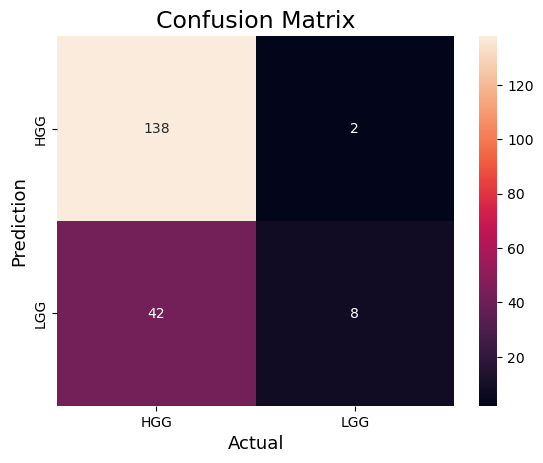

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


#Calculating the confusion matrix.
matrix = confusion_matrix(y_true,y_pred)
 
#Computing the confusion matrix.
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['HGG', 'LGG'],
            yticklabels=['HGG','LGG'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('SR_plot.png')
plt.show()

In [ ]:
#Saving epoch and accuracy results into  a csv file
i = 1
Accuracy = []
Epoch = []
Val_accuracy = []

for value in history.history['accuracy']:
    Accuracy.append(value)
    Epoch.append(i)
    i += 1
    
for value in history.history['val_accuracy']:
    Val_accuracy.append(value)

In [ ]:
import csv

csv_file = 'epcoch_SR_results.csv'

# Combine the two lists into a list of tuples
data = zip(Epoch, Accuracy, Val_accuracy)

# Write to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['Epoch', 'Accuracy', 'Val_accuracy'])
    
    # Write the data
    writer.writerows(data)

print(f'CSV file "{csv_file}" created successfully.')

### Training with LR scans

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

train_ds = keras.utils.image_dataset_from_directory(
    directory=r'D:\Gaussian_blur_bicubic_interpolation\Classification\LR\train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    color_mode="rgb",
    seed=123,
    image_size=(60, 60))


test_ds = keras.utils.image_dataset_from_directory(
    directory=r'D:\Gaussian_blur_bicubic_interpolation\Classification\LR\test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    color_mode="rgb",
    seed=123,
    image_size=(60, 60))

Found 1512 files belonging to 2 classes.
Found 190 files belonging to 2 classes.


In [22]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(60,60,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])


callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,  restore_best_weights=True)

history = resnet_model.fit(train_ds, epochs=40, callbacks=[callback], validation_data = test_ds)

Epoch 1/40
48/48 [==============================] - 17s 286ms/step - loss: 1.1678 - accuracy: 0.6634 - val_loss: 0.7817 - val_accuracy: 0.7368
Epoch 2/40
48/48 [==============================] - 12s 254ms/step - loss: 1.1636 - accuracy: 0.6607 - val_loss: 0.8491 - val_accuracy: 0.5105
Epoch 3/40
48/48 [==============================] - 12s 250ms/step - loss: 1.0679 - accuracy: 0.6819 - val_loss: 0.7562 - val_accuracy: 0.6316
Epoch 4/40
48/48 [==============================] - 12s 248ms/step - loss: 0.9658 - accuracy: 0.6858 - val_loss: 2.3401 - val_accuracy: 0.2684
Epoch 5/40
48/48 [==============================] - 12s 247ms/step - loss: 1.1668 - accuracy: 0.6713 - val_loss: 0.9956 - val_accuracy: 0.5421
Epoch 6/40
48/48 [==============================] - 12s 255ms/step - loss: 1.0113 - accuracy: 0.6845 - val_loss: 1.7897 - val_accuracy: 0.7368
Epoch 7/40
48/48 [==============================] - 12s 250ms/step - loss: 0.9628 - accuracy: 0.6984 - val_loss: 0.8260 - val_accuracy: 0.6474

In [23]:
import numpy as np

y_pred = []
y_true = []

for img, labels in test_ds:
    group_labels = resnet_model.predict(img)
    for label in group_labels.tolist():
        y_pred.append(np.round(label[0]))
    labels = labels.numpy()
    for label in labels.tolist():
        y_true.append(label[0])

1/1 [==============================] - 1s 1s/step


In [24]:
y_pred

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.736842
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


C:\Users\tripl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


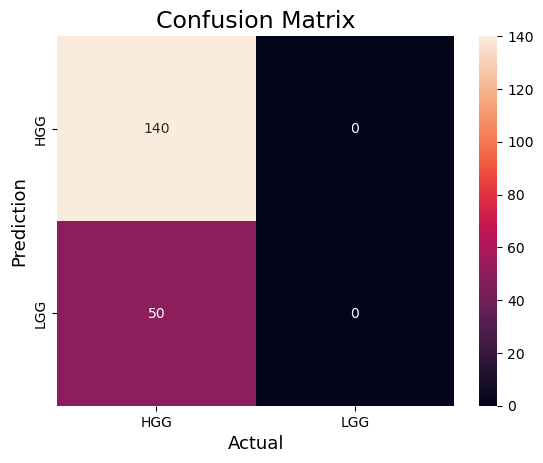

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


#Calculating the confusion matrix.
matrix = confusion_matrix(y_true,y_pred)
 
#Computing the confusion matrix.
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['HGG', 'LGG'],
            yticklabels=['HGG','LGG'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.savefig('LR_plot.png')
plt.show()